In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-box-office-collection-data-2000-2024/2010-2024 Movies Box Ofice Collection.csv
/kaggle/input/movies-box-office-collection-data-2000-2024/2000-2009 Movies Box Ofice Collection.csv
/kaggle/input/movies-box-office-collection-data-2000-2024/2024 Movies Box Ofice Collection.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv('/kaggle/input/movies-box-office-collection-data-2000-2024/2010-2024 Movies Box Ofice Collection.csv')
data2 = pd.read_csv('/kaggle/input/movies-box-office-collection-data-2000-2024/2000-2009 Movies Box Ofice Collection.csv')
data3 = pd.read_csv('/kaggle/input/movies-box-office-collection-data-2000-2024/2024 Movies Box Ofice Collection.csv')

In [4]:
data = pd.concat([data2,data1,data3],ignore_index=True)
df = data.copy()

In [5]:
data.columns

Index(['Unnamed: 0', 'Release Group', 'Worldwide', 'Domestic',
       'Domestic_percent', 'Foreign', 'Foreign_percent', 'year', 'Rank'],
      dtype='object')

In [6]:
data.year

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
4995    2024
4996    2024
4997    2024
4998    2024
4999    2024
Name: year, Length: 5000, dtype: int64

In [7]:
data.drop(['Rank','Unnamed: 0'],axis=1,inplace=True)

# Data Cleaning 

In [8]:
data.isnull().sum()

Release Group       0
Worldwide           0
Domestic            0
Domestic_percent    0
Foreign             0
Foreign_percent     0
year                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Group     5000 non-null   object
 1   Worldwide         5000 non-null   object
 2   Domestic          5000 non-null   object
 3   Domestic_percent  5000 non-null   object
 4   Foreign           5000 non-null   object
 5   Foreign_percent   5000 non-null   object
 6   year              5000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [10]:
data.columns

Index(['Release Group', 'Worldwide', 'Domestic', 'Domestic_percent', 'Foreign',
       'Foreign_percent', 'year'],
      dtype='object')

In [11]:
#we need to convert the numerical data from object to float
X = data.copy()
X.columns = X.columns.str.strip()
X.columns

Index(['Release Group', 'Worldwide', 'Domestic', 'Domestic_percent', 'Foreign',
       'Foreign_percent', 'year'],
      dtype='object')

In [12]:
X['Domestic']= X['Domestic'].str.replace(",","").astype(float)
X['Worldwide']= X['Worldwide'].str.replace(",","").astype(float)
X['Foreign']= X['Foreign'].str.replace(",","").astype(float)
X['Domestic_percent'] = X['Domestic_percent'].str.strip('%')
X['Domestic_percent'] = X['Domestic_percent'].str.replace('<0.1',"0").astype(float)
X['Foreign_percent'] = X['Foreign_percent'].str.strip('%')
X['Foreign_percent'] = X['Foreign_percent'].str.replace('<0.1',"0").astype(float)
X['year'] = X['year'].astype(int)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Group     5000 non-null   object 
 1   Worldwide         5000 non-null   float64
 2   Domestic          5000 non-null   float64
 3   Domestic_percent  5000 non-null   float64
 4   Foreign           5000 non-null   float64
 5   Foreign_percent   5000 non-null   float64
 6   year              5000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB


In [14]:
#Renaming the Columns for better understanding
X.rename(columns ={"Release Group":"Movie Name"},inplace=True)

In [15]:
X[X.year ==2001]

,Movie Name,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
200,Harry Potter and the Sorcerer's Stone,974755371.0,317575550.0,32.6,657179821.0,67.4,2001
201,The Lord of the Rings: The Fellowship of the Ring,868385360.0,313364114.0,36.1,555021246.0,63.9,2001
202,"Monsters, Inc.",528773250.0,255873250.0,48.4,272900000.0,51.6,2001
203,Shrek,484596038.0,267851831.0,55.3,216744207.0,44.7,2001
204,Ocean's Eleven,450717150.0,183417150.0,40.7,267300000.0,59.3,2001
...,...,...,...,...,...,...,...
395,The Golden Bowl,5753678.0,3050532.0,53.0,2703146.0,47.0,2001
396,A Fish Tale,5595327.0,563911.0,10.1,5031416.0,89.9,2001
397,Made,5480653.0,5313300.0,96.9,167353.0,3.1,2001
398,Read My Lips,5393526.0,1471911.0,27.3,3921615.0,72.7,2001


# Finding Insights

 Average Movie Earning Each year

In [16]:
# Each year average 
years = list(range(2001,2025))
avg_worldwide = []
avg_domestic = []
avg_foreign = []
for year in years:
    year_data = X[X.year==year]
    year_worldwide = year_data['Worldwide']
    year_domestic = year_data['Domestic']
    year_foreign = year_data['Foreign']
    avg_worldwide.append(np.mean(year_worldwide))
    avg_domestic.append(np.mean(year_domestic))
    avg_foreign .append(np.mean(year_foreign))
    
    

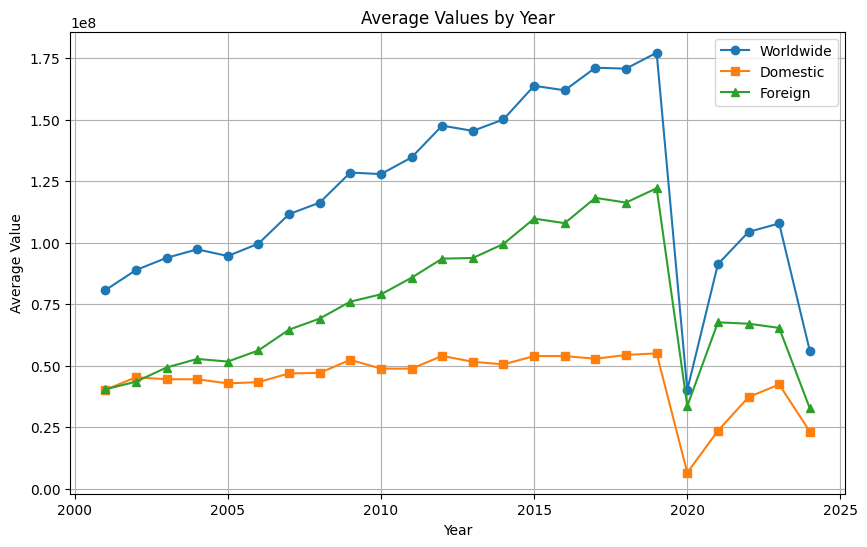

In [17]:
#plotting the plots 
# Plotting
plt.figure(figsize=(10, 6))

# Plot each list
plt.plot(years, avg_worldwide, label='Worldwide', marker='o')
plt.plot(years, avg_domestic, label='Domestic', marker='s')
plt.plot(years, avg_foreign, label='Foreign', marker='^')

# Add titles and labels
plt.title('Average Values by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()  # Add a legend to distinguish the lines

# Show the plot
plt.grid(True)
plt.show()

What the Graph Says:

1. **Worldwide Growth (2000-2019):** Significant increase in average values, indicating global success of Hollywood movies.

2. **Domestic Stability:** U.S. market (Domestic) remained relatively flat, showing little growth.

3. **Foreign Market Expansion:** Strong upward trend in foreign markets, highlighting increasing international popularity.

4. **2020 Pandemic Impact:** Sharp decline across all categories due to COVID-19, affecting box office revenues.

5. **Partial Recovery Post-2020:** Some recovery observed, but values have not returned to pre-pandemic levels, especially Worldwide.

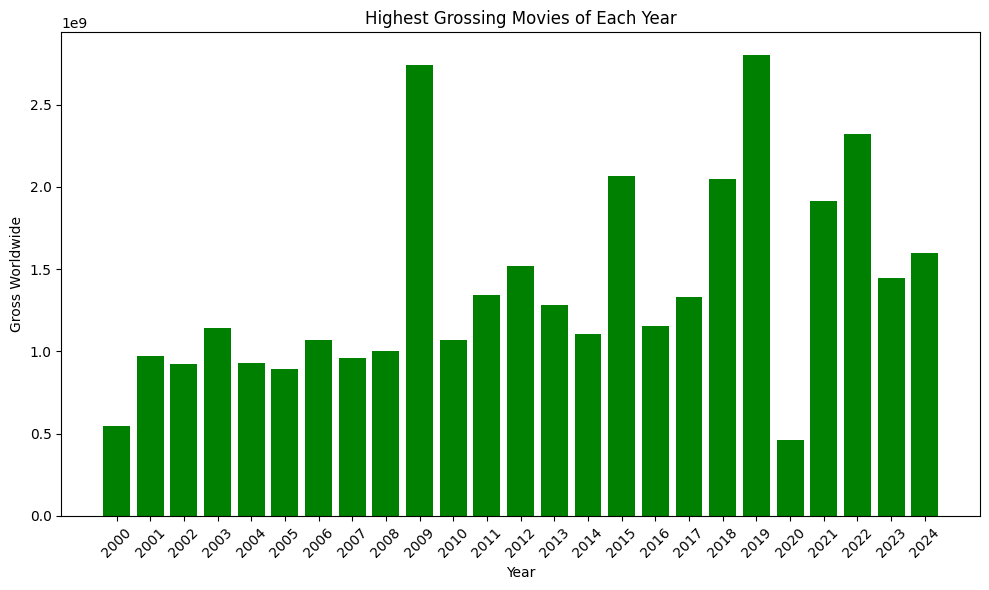

In [18]:
#lets look at the highest grossing moives of by each year
# Find the highest-grossing movie for each year
highest_grossing = X.loc[X.groupby('year')['Worldwide'].idxmax()]
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(highest_grossing['year'].astype(str), highest_grossing['Worldwide'], color='green')
plt.xlabel('Year')
plt.ylabel('Gross Worldwide')
plt.title('Highest Grossing Movies of Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The highest grossing moives each year has pretty much not changed.

- This suggests that Hollywood does produce a few flims a year that are crossing billion dollar mark.

- But are these top movies outliers?
- Lets compare the difference between the top movie each year and the top 5 th most earning movie each year.


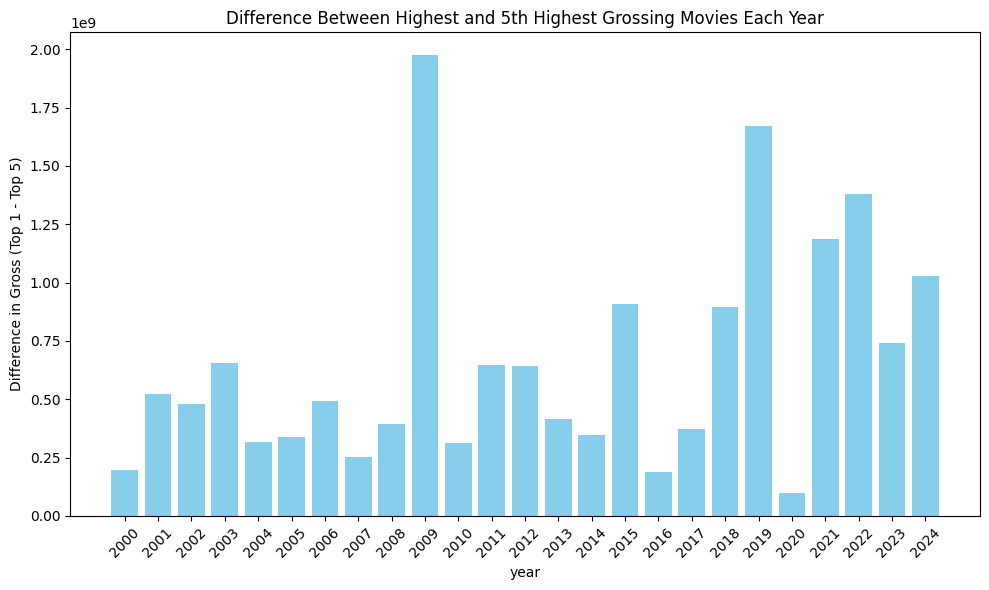

In [19]:
# Sort by Year and Worldwide Gross
df_sorted = X.sort_values(by=['year', 'Worldwide'], ascending=[True, False])

# Get the top 5 movies for each year
top_5_movies = df_sorted.groupby('year').head(5)

# Find the highest and 5th highest grossing movies
highest_grossing = top_5_movies.groupby('year').nth(0).reset_index()
fifth_highest_grossing = top_5_movies.groupby('year').nth(4).reset_index()

# Merge the two DataFrames on 'Year'
difference_df = pd.merge(highest_grossing, fifth_highest_grossing, on='year', suffixes=('_top1', '_top5'))

# Calculate the difference
difference_df['Difference'] = difference_df['Worldwide_top1'] - difference_df['Worldwide_top5']

# Plot the difference
plt.figure(figsize=(10, 6))
plt.bar(difference_df['year'].astype(str), difference_df['Difference'], color='skyblue')
plt.xlabel('year')
plt.ylabel('Difference in Gross (Top 1 - Top 5)')
plt.title('Difference Between Highest and 5th Highest Grossing Movies Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explanation of the Graph:
# 1. 2009 (Avatar):
- The enormous difference in 2009 is due to the release of "Avatar," which set a record for worldwide box office collections, making it an outlier compared to the 5th highest-grossing movie that year.

# 2. 2019 (Avengers: Endgame):
- In 2019, "Avengers: Endgame" broke the record held by "Avatar," leading to another significant spike in the difference between the top-grossing movie and the 5th highest, indicating it was an outlier.

# 3. Post-2019 Trend:

- After 2019, there is a noticeable increase in the differences, suggesting that while Hollywood continues to produce blockbuster hits, these are becoming more isolated successes rather than part of a broader trend of high-grossing films. This could indicate that the industry is producing fewer high-grossing movies overall, with a larger gap between the most successful movie and the rest of the top 5.

# Fall off in the Domestic Market



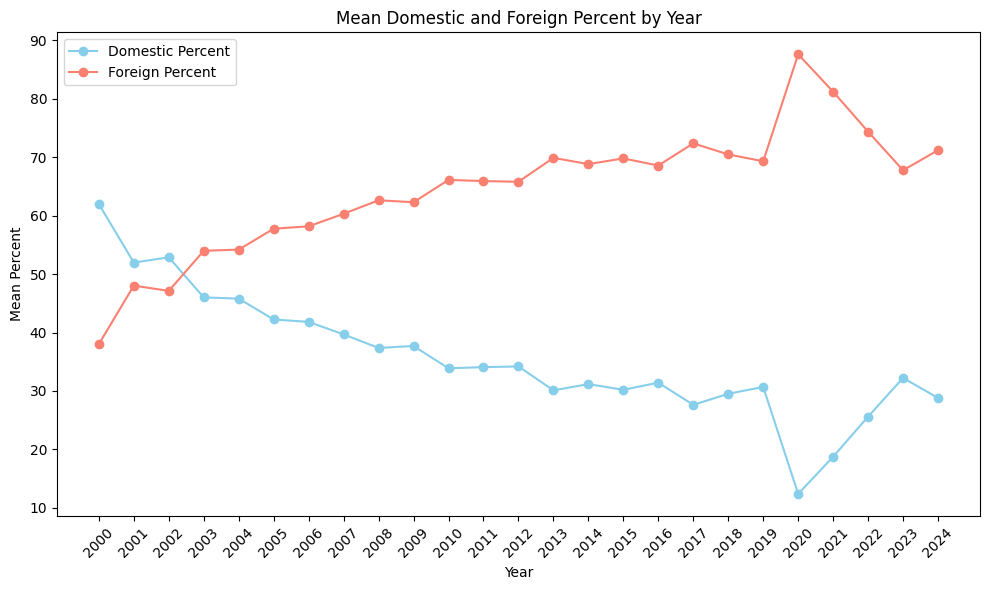

In [20]:
#lets calcuate the average internation market percentage by each year
# Calculate mean domestic market for each year
# Calculate mean Domestic_percent and Foreign_percent for each year
df_domestic = X.groupby('year')['Domestic_percent'].mean().reset_index()
df_foreign = X.groupby('year')['Foreign_percent'].mean().reset_index()

# Merge the two DataFrames
df_percentage = pd.merge(df_domestic, df_foreign, on='year', suffixes=('_Domestic', '_Foreign'))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_percentage['year'].astype(str), df_percentage['Domestic_percent'], label='Domestic Percent', color='skyblue', marker='o')
plt.plot(df_percentage['year'].astype(str), df_percentage['Foreign_percent'], label='Foreign Percent', color='salmon', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Percent')
plt.title('Mean Domestic and Foreign Percent by Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of the Graph :
1. The Domestic audience is contributing less to the Hollywood from the year 2000 we can see a decline in the percentage contribution.
2. There is a rise in the International Market, After the pandemic, the International market did take a hit but seems to be recovering.
3. After pandemic there has been a liftoff  in domestic market but it hasen't shown any breakout progress. we will have to wait and see 


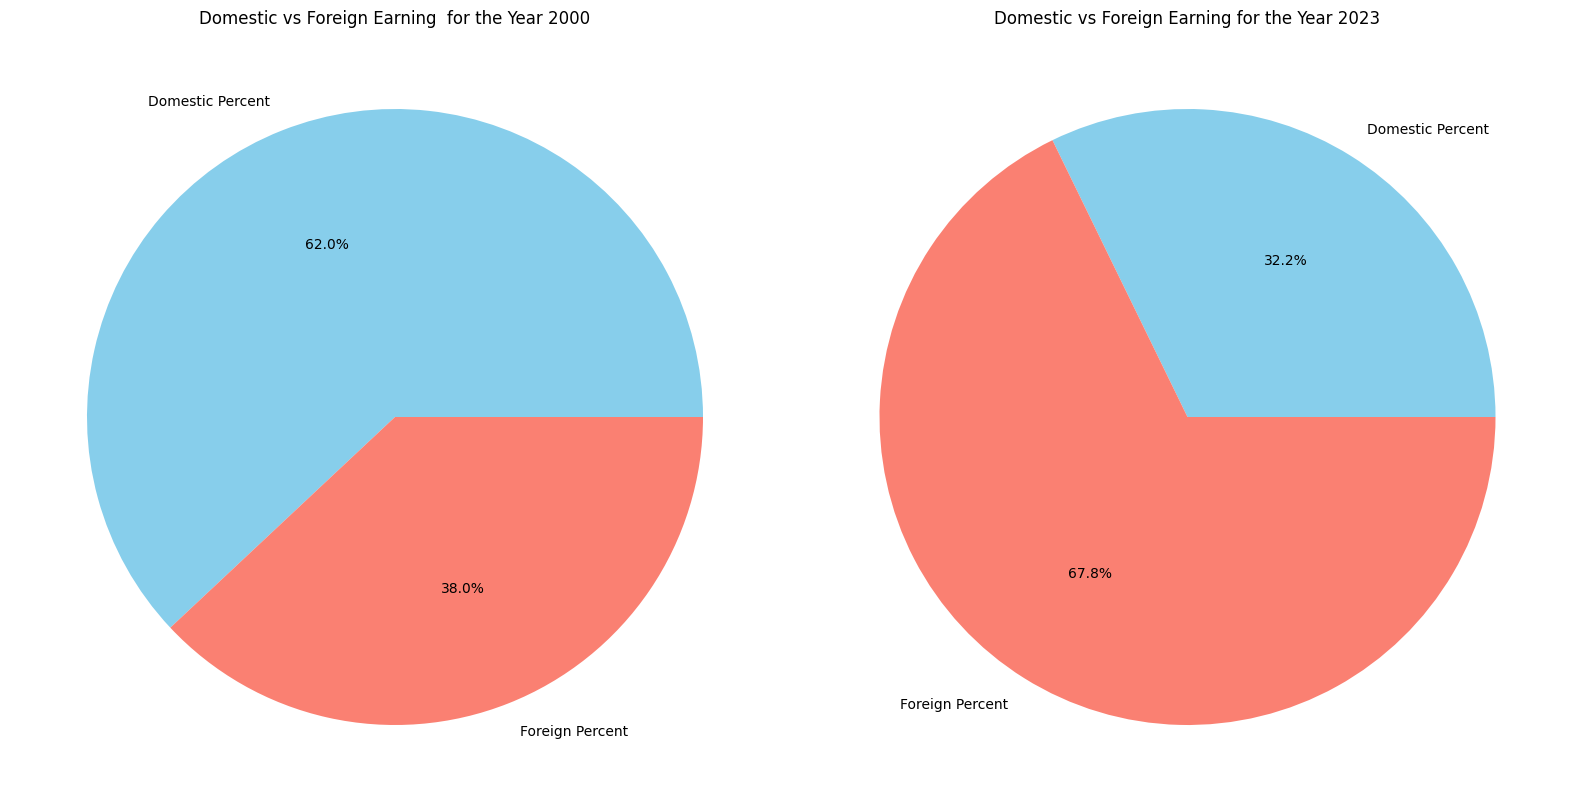

In [21]:
# audience change from year 2000 to 2023

dom_percent2000 = np.mean(X[X.year==2000]['Domestic_percent'])
for_percent2000 = np.mean(X[X.year==2000]['Foreign_percent'])

# Data for the pie chart
percentages2000 = [dom_percent2000, for_percent2000]
labels = ['Domestic Percent', 'Foreign Percent']

dom_percent2023 = np.mean(X[X.year==2023]['Domestic_percent'])
for_percent2023 = np.mean(X[X.year==2023]['Foreign_percent'])
percentages2023 = [dom_percent2023, for_percent2023]

# Plotting the pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the pie chart for the year 2000
axes[0].pie(percentages2000, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Domestic vs Foreign Earning  for the Year 2000')

# Plotting the pie chart for the year 2023
axes[1].pie(percentages2023, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Domestic vs Foreign Earning for the Year 2023')

# Adjust layout
plt.tight_layout()
plt.show()



# Final Analysis of Hollywood Box Office Trends (2000-2024)

#### 1. **Worldwide Growth (2000-2019):**
   - Significant increase in global box office revenues, driven by Hollywood's expanding international appeal.
   - **Domestic Market Stability:** U.S. market remained flat, contributing less to the overall growth.

#### 2. **Foreign Market Expansion:**
   - Strong growth in foreign markets, indicating Hollywood's increasing focus on global audiences.

#### 3. **Impact of the 2020 Pandemic:**
   - Sharp decline across all categories due to COVID-19, with only partial recovery afterward. Box office revenues have yet to return to pre-pandemic levels.

#### 4. **Top-Grossing Movies and Outliers:**
   - The highest-grossing movies each year remain consistent, with some films like "Avatar" and "Avengers: Endgame" standing out as major outliers, creating a large gap between themselves and other top movies.

#### 5. **Post-2019 Trends:**
   - An increasing gap between the top-grossing movie and the 5th highest, suggesting fewer high-grossing films overall and more isolated blockbuster successes.
   - **Shift in Audience Contributions:** Decline in domestic audience contribution since 2000, with a modest recovery post-pandemic, but still lagging behind the growth seen in the international market.

#### Conclusion:
Hollywood's success is increasingly dependent on global markets, with fewer universally high-grossing films. The industry's future strategies will likely focus on maintaining global appeal while adapting to changes in the domestic market.